In [1]:
# !pip install xlrd

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('All_data_FIW_2013-2022.xlsx', sheet_name = 1, header=1)

In [5]:
df

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,West Bank,Middle East,t,2013,NF,6,5,0,0,2,...,0,1,5,1,1,2,1,5,24,30
2091,Western Sahara,Africa,t,2013,NF,7,7,0,0,0,...,0,0,0,1,1,2,0,4,7,5
2092,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0,1,2,2,1,1,1,5,16,25
2093,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,2,2,8,3,2,1,2,8,34,62


In [8]:
df['Status'].value_counts()

F     876
PF    632
NF    587
Name: Status, dtype: int64

In [21]:
## number of countries/territories in one of the three freedom status by year

status_by_year = pd.DataFrame(df.groupby(['Edition','Status']).size())
status_by_year.reset_index(inplace=True)
status_by_year.columns = ['year', 'status', 'count']
status_by_year

,year,status,count
0,2013,F,92
1,2013,NF,54
2,2013,PF,63
3,2014,F,90
4,2014,NF,55
5,2014,PF,64
6,2015,F,91
7,2015,NF,59
8,2015,PF,60
9,2016,F,88


<AxesSubplot:xlabel='year', ylabel='count'>

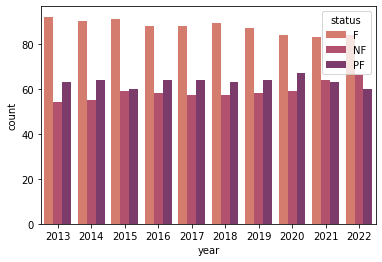

In [24]:
# status_by_year
sns.barplot(x='year', y='count', hue='status', data=status_by_year, palette="flare")


** NOTES **

Uisng a barplot to represent the number of countries in ech status by year, it's not that esy to see
the trend or which direction countries are going in general. it's not really telling

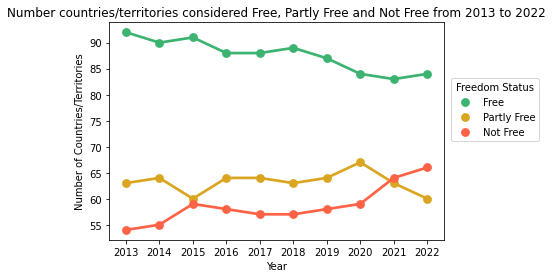

In [59]:
ax = sns.pointplot(x="year", y="count", hue="status", hue_order=['F','PF','NF'], data=status_by_year,
                  palette=['mediumseagreen','goldenrod','tomato'])
ax.set(xlabel='Year', ylabel='Number of Countries/Territories',
       title='Number countries/territories considered Free, Partly Free and Not Free from 2013 to 2022')

handlesObj, labels = ax.get_legend_handles_labels()

plt.legend(labels=['Free','Partly Free','Not Free'], handles=handlesObj, loc=7,
           bbox_to_anchor=(1.3, .6), title='Freedom Status')


** NOTES **

Using a dot plot and connecting the datapoints for the same status for all years, it shows adecrease in the number of countries considered free with the most significant dip happening in the years
2018-2021. It is also clear to see the the number of countries considered noot free increasing starting from 2017
and having a significant jup in 2020.
It is also interesting to see how the partly free and not free trends tend to move in opposite direction
from each other. When the number of partly free countries is somewhat steady so is the number of not free countries,
but when there is a significant dip or jump, we can see the opposite happening in the not free countries.

A POTENTIAL HYPOTHESIS:

There seems to a potential relationship berween number of partly free and not free countries, this couls mean that because partly free countries' institutions are more vulnerable to attacks on democracy and freedom, the flunctuation of not free countries is mostly dependent on partly free countries and how well they are able to solidy freedom?

NEXT STEPS:
* group by region as well to see the trends and and see which regions have the most concentration of not free countries that can be the cause of international conflict
* since there are significantly more free countries than both not free and partly free, mayeb concentarte on the latter too and plot other features to see what are some tendecies.
*...
